In [ ]:
#Data Set 1 https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv
#Data Set 2 https://www.kaggle.com/code/valchovalev/real-estate-world-3-d-top-500-cities-plus-dtree/input?select=real_estator_world_may2021.csv
#Data Set 3 https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 

*DATA SET 1 (ds.salaries.csv) CLEANING AND OBSERVATIONS*


In [6]:
# Importing Salaries Data Set 1 from local folder and checking the column keys and layout
df1='C:/Users/nheav/DAProj/DAPro/ds.salaries.csv'
sals=pd.read_csv(df1,index_col=[0])
sals.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
sals.isnull().sum() #checking for null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
sals=pd.read_csv(df1) # Reset to df1 and check for duplicates
sals.duplicated().sum() 

0

In [9]:
sals.info() # Variable description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
sals.describe().T # Describe intiger values in transposed method output

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [11]:
# Viewing the data by country/location averages using groupby and mean methods
loc_avg=sals.groupby(['company_location'])
loc_avg.mean()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
company_location,,,,,
AE,328.333333,2021.333333,1.000000e+05,100000.000000,66.666667
AS,244.000000,2021.000000,1.335000e+06,18053.000000,100.000000
AT,202.750000,2020.750000,6.400000e+04,72920.750000,25.000000
AU,506.000000,2022.000000,1.303333e+05,108042.666667,83.333333
BE,181.500000,2021.000000,7.250000e+04,85699.000000,75.000000
BR,203.000000,2021.000000,6.520000e+04,18602.666667,33.333333
CA,344.833333,2021.566667,1.153067e+05,99823.733333,75.000000
CH,365.500000,2021.500000,2.750000e+05,64114.000000,0.000000
CL,177.000000,2021.000000,3.040000e+07,40038.000000,100.000000


In [12]:
# Viewing the data by job title using groupby and aggregate methods
sals=pd.read_csv(df1,index_col=[0])
sals.groupby(['job_title']).agg(['mean','median'])

work_year                salary  \
                                                 mean  median          mean   
job_title                                                                     
3D Computer Vision Researcher             2021.000000  2021.0  4.000000e+05   
AI Scientist                              2021.142857  2021.0  2.905714e+05   
Analytics Engineer                        2022.000000  2022.0  1.750000e+05   
Applied Data Scientist                    2021.600000  2022.0  1.724000e+05   
Applied Machine Learning Scientist        2021.500000  2021.5  1.413500e+05   
BI Data Analyst                           2020.833333  2021.0  1.902045e+06   
Big Data Architect                        2021.000000  2021.0  1.250000e+05   
Big Data Engineer                         2020.625000  2021.0  4.550000e+05   
Business Data Analyst                     2021.000000  2021.0  3.550000e+05   
Cloud Data Engineer                       2021.000000  2021.0  1.400000e+05   
Computer Vision Engineer                  2021.166667  2021.0  8.350000e+04   
Computer Vision Software Engineer         2021.333333  2021.0  1.003333e+05   
Data Analyst                              2021.680412  2022.0  9.660496e+04   
Data Analytics Engineer                   2021.250000  2021.0  6.175000e+04   
Data Analytics Lead                       2022.000000  2022.0  4.050000e+05   
Data Analytics Manager                    2021.571429  2022.0  1.271343e+05   
Data Architect                            2021.727273  2022.0  1.778739e+05   
Data Engineer                             2021.590909  2022.0  1.792106e+05   
Data Engineering Manager                  2020.600000  2021.0  1.197998e+05   
Data Science Consultant                   2020.714286  2021.0  1.227143e+05   
Data Science Engineer                     2021.333333  2021.0  8.450000e+04   
Data Science Manager                      2021.333333  2021.0  1.062599e+06   
Data Scientist                            2021.391608  2022.0  5.083472e+05   
Data Specialist                           2021.000000  2021.0  1.650000e+05   
Director of Data Engineering              2021.000000  2021.0  1.412500e+05   
Director of Data Science                  2021.000000  2021.0  1.932857e+05   
ETL Developer                             2022.000000  2022.0  5.000000e+04   
Finance Data Analyst                      2021.000000  2021.0  4.500000e+04   
Financial Data Analyst                    2021.500000  2021.5  2.750000e+05   
Head of Data                              2021.400000  2021.0  1.564000e+05   
Head of Data Science                      2021.500000  2021.5  1.467188e+05   
Head of Machine Learning                  2022.000000  2022.0  6.000000e+06   
Lead Data Analyst                         2020.666667  2021.0  5.690000e+05   
Lead Data Engineer                        2020.833333  2021.0  1.403333e+05   
Lead Data Scientist                       2020.333333  2020.0  1.101667e+06   
Lead Machine Learning Engineer            2022.000000  2022.0  8.000000e+04   
ML Engineer                               2021.000000  2021.0  2.676667e+06   
Machine Learning Developer                2021.666667  2022.0  1.000000e+05   
Machine Learning Engineer                 2021.317073  2021.0  2.727179e+05   
Machine Learning Infrastructure Engineer  2021.000000  2021.0  9.733333e+04   
Machine Learning Manager                  2020.000000  2020.0  1.570000e+05   
Machine Learning Scientist                2021.250000  2021.0  1.584125e+05   
Marketing Data Analyst                    2021.000000  2021.0  7.500000e+04   
NLP Engineer                              2022.000000  2022.0  2.400000e+05   
Principal Data Analyst                    2021.500000  2021.5  1.225000e+05   
Principal Data Engineer                   2021.000000  2021.0  3.283333e+05   
Principal Data Scientist                  2021.000000  2021.0  2.067143e+05   
Product Data Analyst                      2020.000000  2020.0  2.350000e+05   
Research Scient

The job title output is very diverse and this study particular interest is Data Analyst which requires further refinement

In [13]:
# grouping the data by job title 'data analyst' using groupby and get_group to output to a new data set da_group.csv
df1='C:/Users/nheav/DAProj/DAPro/ds.salaries.csv'
sals=pd.read_csv(df1,index_col=[0])
sals.groupby(['job_title']).get_group(('Data Analyst')).to_csv('da_group.csv')

In [32]:
# new data set specific to Data Analyst role
datyst='C:/Users/nheav/DAProj/DAPro/da_group.csv'
dat=pd.read_csv(datyst,index_col=[4])
dat.head()

,Unnamed: 0,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
job_title,,,,,,,,,,,
Data Analyst,5,2020,EN,FT,72000,USD,72000,US,100,US,L
Data Analyst,14,2020,MI,FT,85000,USD,85000,US,100,US,L
Data Analyst,15,2020,MI,FT,8000,USD,8000,PK,50,PK,L
Data Analyst,34,2020,MI,FT,41000,EUR,46759,FR,50,FR,L
Data Analyst,38,2020,EN,FT,10000,USD,10000,NG,100,NG,S


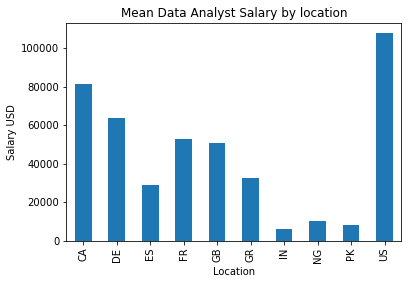

In [33]:
# Data Analyst-mean salary plot by company location in USD
import pandas as pd
datyst='C:/Users/nheav/DAProj/DAPro/da_group.csv'
dat=pd.read_csv(datyst,index_col=[4])
anyst_jobs=dat.groupby(['company_location'])
anyst_jobs.mean()
anyst_sal=anyst_jobs.mean()
saljob=anyst_sal['salary_in_usd']
saljob.plot(kind="bar",x='USD', align='center',width=.5)
plt.xlabel('Location')
plt.ylabel('Salary USD')
plt.title("Mean Data Analyst Salary by location")
plt.show ()

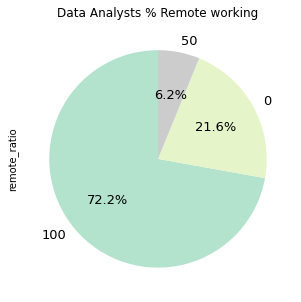

In [20]:
# Plotting the remote ratio breakout for Data Analysts
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Data Analysts % Remote working'
)

dat['remote_ratio'].value_counts().plot.pie(**kwargs)
plt.show()

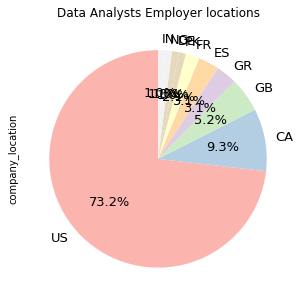

In [21]:
# Plotting the remote employer loaction distribution
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel1',
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Data Analysts Employer locations'
)

dat['company_location'].value_counts().plot.pie(**kwargs)
plt.show()



DATA SET 2 (real_estator_world_may2021.csv) CLEANING AND OBSERVATIONS

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [25]:
# Importing Real estate Data Set 2 from local folder and checking the column keys and layout
df2='C:/Users/nheav/DAProj/DAPro/real_estator_world_may2021.csv'
reals=pd.read_csv(df2,index_col=[0])
reals.head()

,city,country,PriceToIncomeRatio,GrossRentalYieldCityCentre,GrossRentalYieldOutsideofCentre,PriceToRentRatioCityCentre,PriceToRentRatioOutsideOfCityCentre,MortgageAsAPercentageOfIncome,AffordabilityIndex,latitude,longitude,name,desc,source,precision
Rank,,,,,,,,,,,,,,,
1,Memphis,United States,1.44,19.29,34.99,5.18,2.86,10.22,9.78,35.143378,-90.052136,"Memphis, United States","Memphis, Shelby County, TN, US",MapQuest,city/town
2,Detroit,United States,1.53,29.26,37.41,3.42,2.67,11.12,8.99,42.332916,-83.047853,"Detroit, United States","Detroit, Wayne County, MI, US",MapQuest,city/town
3,Syracuse,United States,1.57,21.51,30.90,4.65,3.24,11.49,8.71,43.047945,-76.147448,"Syracuse, United States","Syracuse, Onondaga County, NY, US",MapQuest,city/town
4,Saint Louis,United States,1.67,12.13,19.10,8.24,5.23,11.84,8.45,38.630276,-90.200309,"Saint Louis, United States","St Louis, St. Louis County, MO, US",MapQuest,city/town
5,Rochester,United States,1.65,13.52,27.32,7.39,3.66,11.88,8.42,43.155708,-77.612547,"Rochester, United States","Rochester, Monroe County, NY, US",MapQuest,city/town


In [31]:
reals.isnull().sum() #checking for null values

city                                   0
country                                0
PriceToIncomeRatio                     0
GrossRentalYieldCityCentre             0
GrossRentalYieldOutsideofCentre        0
PriceToRentRatioCityCentre             0
PriceToRentRatioOutsideOfCityCentre    0
MortgageAsAPercentageOfIncome          0
AffordabilityIndex                     0
latitude                               0
longitude                              0
name                                   0
desc                                   0
source                                 0
precision                              0
dtype: int64

In [26]:
reals=pd.read_csv(df2) # Reset to df2 and check for duplicates
reals.duplicated().sum() 

0

In [33]:
reals.info() # Variable description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rank                                 523 non-null    int64  
 1   city                                 523 non-null    object 
 2   country                              523 non-null    object 
 3   PriceToIncomeRatio                   523 non-null    float64
 4   GrossRentalYieldCityCentre           523 non-null    float64
 5   GrossRentalYieldOutsideofCentre      523 non-null    float64
 6   PriceToRentRatioCityCentre           523 non-null    float64
 7   PriceToRentRatioOutsideOfCityCentre  523 non-null    float64
 8   MortgageAsAPercentageOfIncome        523 non-null    float64
 9   AffordabilityIndex                   523 non-null    float64
 10  latitude                             523 non-null    float64
 11  longitude                       

In [34]:
reals.describe() # Describe intiger values

,Rank,PriceToIncomeRatio,GrossRentalYieldCityCentre,GrossRentalYieldOutsideofCentre,PriceToRentRatioCityCentre,PriceToRentRatioOutsideOfCityCentre,MortgageAsAPercentageOfIncome,AffordabilityIndex,latitude,longitude
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,265.982792,10.390841,5.694837,7.295545,22.121472,19.610000,100.399924,1.969924,34.229748,-5.587812
std,153.342296,7.614825,3.352933,5.560443,10.953889,13.388132,129.563418,1.660520,20.881202,72.563439
min,1.000000,1.440000,1.230000,0.470000,2.540000,2.150000,10.220000,0.060000,-43.530955,-149.899597
25%,133.500000,6.025000,3.725000,4.185000,14.635000,12.550000,40.420000,0.810000,27.739872,-80.024946
50%,268.000000,9.110000,4.770000,5.340000,20.950000,18.730000,68.820000,1.450000,39.738453,10.213405
75%,398.500000,12.810000,6.835000,7.970000,26.840000,23.900000,123.795000,2.475000,47.889163,35.701197
max,529.000000,71.040000,39.340000,46.440000,81.290000,211.190000,1700.050000,9.780000,69.649416,174.777224


In [8]:
# visualization of global relal estate df using plotly
import plotly.express as px
import pandas as pd
relscy='C:/Users/nheav/DAProj/DAPro/reals_country.csv'
reals=pd.read_csv(relscy)


# Create a scatter plot on a map using Plotly Express
fig = px.scatter_mapbox(reals, lat='latitude', lon='longitude',
                        hover_name='country',
                        color='Rank',
                        size='PriceToIncomeRatio',
                        zoom=4, height=600)

# Update the map style
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()

In [27]:
# Viewing the data by country/location averages using groupby and mean methods
reals_country=reals.groupby(reals['country'])
reals_country.mean()

,Rank,PriceToIncomeRatio,GrossRentalYieldCityCentre,GrossRentalYieldOutsideofCentre,PriceToRentRatioCityCentre,PriceToRentRatioOutsideOfCityCentre,MortgageAsAPercentageOfIncome,AffordabilityIndex,latitude,longitude
country,,,,,,,,,,
Afghanistan,460.000000,13.450000,3.390000,4.640000,29.530000,21.560000,178.080000,0.560000,34.519706,69.162430
Albania,394.000000,15.590000,4.040000,5.390000,24.760000,18.560000,121.370000,0.820000,41.331144,19.826398
Algeria,500.000000,26.360000,2.940000,3.170000,33.970000,31.530000,242.030000,0.410000,36.775348,3.060066
Argentina,528.000000,31.850000,2.780000,2.190000,36.030000,45.560000,1462.790000,0.070000,-34.612869,-58.445979
Armenia,497.000000,18.290000,4.900000,4.660000,20.420000,21.480000,228.980000,0.440000,40.177612,44.512585
...,...,...,...,...,...,...,...,...,...,...
United Kingdom,249.000000,9.905556,3.825556,5.227778,27.308889,19.705556,66.041111,1.566667,53.018199,-1.922454
United States,88.934959,4.279593,8.413252,14.099675,14.698699,8.518943,30.976016,4.125285,37.315960,-96.799195
Uruguay,453.000000,17.390000,4.020000,3.630000,24.880000,27.560000,168.910000,0.590000,-34.905904,-56.191357


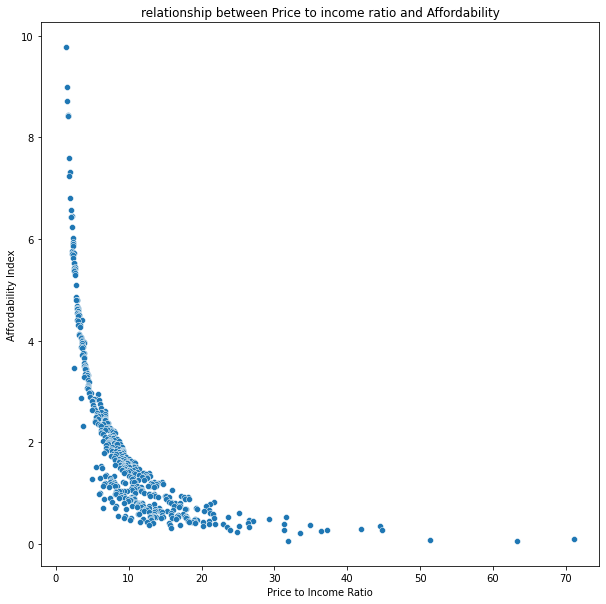

In [30]:
# visualization of relationship between affordability index and price to income ratio
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.figure(figsize=(10,10))
sns.scatterplot(data=reals,x="PriceToIncomeRatio",y="AffordabilityIndex")
plt.xlabel('Price to Income Ratio')
plt.ylabel('Affordability Index')
plt.title("relationship between Price to income ratio and Affordability")
plt.show()




DATA SET 3 (Combined Data Set 1&2 and country codes data_csv.csv) ANLAYSIS AND OBSERVATIONS

In [35]:
# Importing Country codes Data Set (data_csv.csv) from local folder
import pandas as pd
countrycodes='C:/Users/nheav/DAProj/DAPro/data_csv.csv'
codes=pd.read_csv(countrycodes)
codes

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [36]:
# Merging of country codes (codes) df with real estate (reals) df to form a new df (salsy)
relscy='C:/Users/nheav/DAProj/DAPro/reals_country.csv'
reals=pd.read_csv(relscy)
reals.merge(codes, left_on='country', right_on='Name').to_csv('reals_codes.csv')
salscty='C:/Users/nheav/DAProj/DAPro/sals_groups.csv'
salsy=pd.read_csv(salscty)
salsy

,company_location,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
0,AE,328.333333,2021.333333,1.000000e+05,100000.000000,66.666667
1,AS,244.000000,2021.000000,1.335000e+06,18053.000000,100.000000
2,AT,202.750000,2020.750000,6.400000e+04,72920.750000,25.000000
3,AU,506.000000,2022.000000,1.303333e+05,108042.666667,83.333333
4,BE,181.500000,2021.000000,7.250000e+04,85699.000000,75.000000
5,BR,203.000000,2021.000000,6.520000e+04,18602.666667,33.333333
6,CA,344.833333,2021.566667,1.153067e+05,99823.733333,75.000000
7,CH,365.500000,2021.500000,2.750000e+05,64114.000000,0.000000
8,CL,177.000000,2021.000000,3.040000e+07,40038.000000,100.000000
9,CN,150.500000,2020.500000,1.995000e+05,71665.500000,0.000000


In [6]:
# Merging of above data set (salsby) df with real estate (realcod) df to form a new combined data set (alldata)
realscodes='C:/Users/nheav/Project/reals_codes.csv'
realcod=pd.read_csv(realscodes)
realcod
salsy.merge(realcod, left_on='company_location', right_on='Code').to_csv('total_data.csv')
alldat='C:/Users/nheav/Project/total_data.csv'
alldata=pd.read_csv(alldat)
alldata

,Unnamed: 0,company_location,Unnamed: 0_x,work_year,salary,salary_in_usd,remote_ratio,Unnamed: 0_y,country,Rank,...,GrossRentalYieldOutsideofCentre,PriceToRentRatioCityCentre,PriceToRentRatioOutsideOfCityCentre,MortgageAsAPercentageOfIncome,AffordabilityIndex,latitude,longitude,color,Name,Code
0,0,AE,328.333333,2021.333333,1.000000e+05,100000.000000,66.666667,96,United Arab Emirates,97.000000,...,9.363333,11.023333,10.703333,32.200000,3.120000,25.033897,55.018768,NaN,United Arab Emirates,AE
1,1,AT,202.750000,2020.750000,6.400000e+04,72920.750000,25.000000,6,Austria,251.500000,...,3.372500,33.167500,29.985000,67.177500,1.545000,47.842299,14.784320,NaN,Austria,AT
2,2,AU,506.000000,2022.000000,1.303333e+05,108042.666667,83.333333,5,Australia,152.000000,...,5.641429,19.394286,19.008571,44.127143,2.440000,-34.883424,142.874322,NaN,Australia,AU
3,3,BE,181.500000,2021.000000,7.250000e+04,85699.000000,75.000000,11,Belgium,124.333333,...,5.263333,19.423333,19.020000,38.480000,2.610000,51.055012,4.168641,NaN,Belgium,BE
4,4,BR,203.000000,2021.000000,6.520000e+04,18602.666667,33.333333,12,Brazil,451.583333,...,4.486667,23.135000,22.463333,176.090000,0.607500,-20.242629,-45.775253,NaN,Brazil,BR
5,5,CA,344.833333,2021.566667,1.153067e+05,99823.733333,75.000000,15,Canada,171.684211,...,6.165263,18.228947,17.064737,48.324737,2.390526,47.465125,-97.686831,NaN,Canada,CA
6,6,CH,365.500000,2021.500000,2.750000e+05,64114.000000,0.000000,91,Switzerland,187.000000,...,3.267500,36.745000,30.870000,51.472500,1.957500,46.783358,7.806724,NaN,Switzerland,CH
7,7,CL,177.000000,2021.000000,3.040000e+07,40038.000000,100.000000,16,Chile,421.000000,...,3.890000,26.140000,25.690000,139.780000,0.720000,-33.437913,-70.650456,NaN,Chile,CL
8,8,CN,150.500000,2020.500000,1.995000e+05,71665.500000,0.000000,17,China,488.125000,...,1.875000,60.610000,55.551250,244.398750,0.448750,30.051906,115.312034,NaN,China,CN
9,9,CO,191.000000,2021.000000,2.184400e+04,21844.000000,50.000000,18,Colombia,483.500000,...,4.592500,18.222500,21.802500,219.280000,0.477500,6.313563,-75.239171,NaN,Colombia,CO


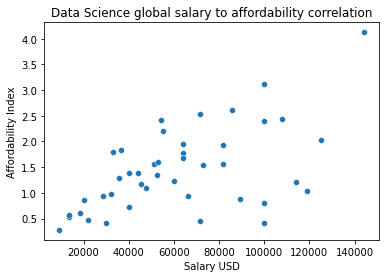

In [16]:
# visualizing the relationship between merged data sets location variables affordability index and salary 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.scatterplot(data=alldata,x="salary_in_usd",y="AffordabilityIndex")
plt.xlabel('Salary USD')
plt.ylabel('Affordability Index')
plt.title("Data Science global salary to affordability correlation")
plt.show()

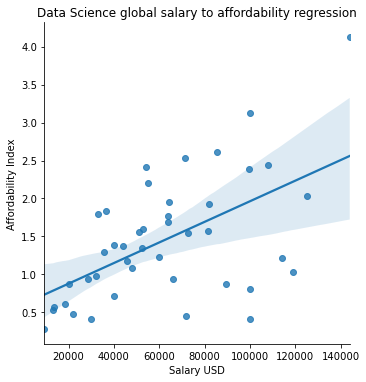

In [18]:
# Applying a simple linear regression model
import matplotlib.pyplot as plt
sns.lmplot(data=alldata,x="salary_in_usd",y="AffordabilityIndex")
plt.xlabel('Salary USD')
plt.ylabel('Affordability Index')
plt.title("Data Science global salary to affordability regression")
plt.show()

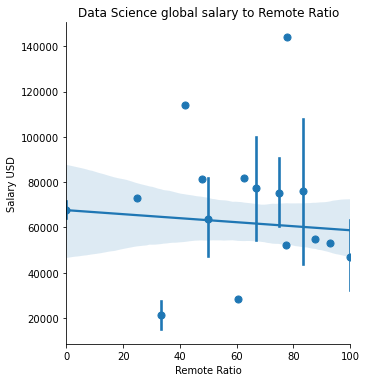

In [26]:
# Applying a logistic regression model based on Remote % worked to salary
import matplotlib.pyplot as plt
import numpy as np
sns.lmplot(data=alldata,x="remote_ratio",y="salary_in_usd", x_estimator=np.mean, ci=90);
plt.xlabel('Remote Ratio')
plt.ylabel('Salary USD')
plt.title("Data Science global salary to Remote Ratio")
plt.show()

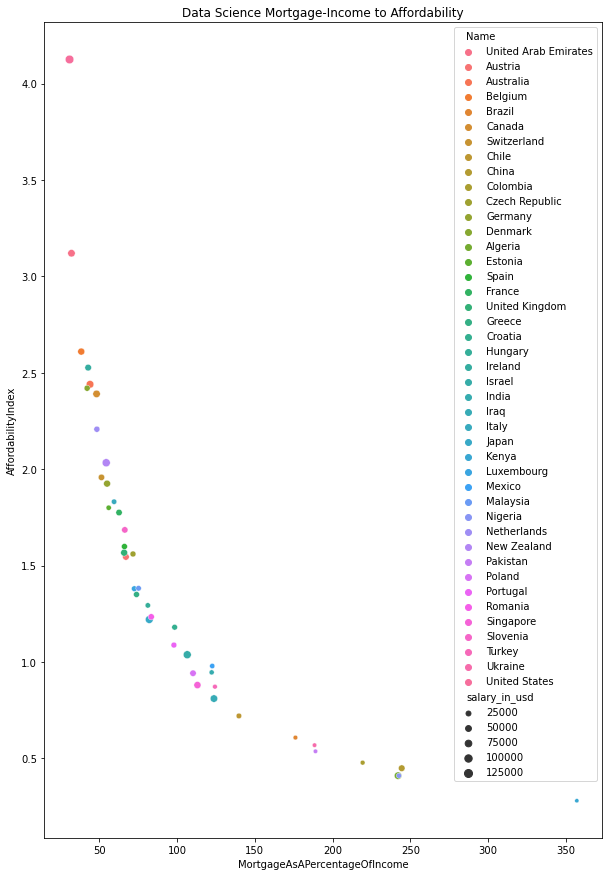

In [34]:
# Visualization of geographical affordability to Mortgage/Income relationship
plt.figure(figsize=(10,15))
hue = {"M": "blue", "F": "red"}
sns.scatterplot(data=alldata,x='MortgageAsAPercentageOfIncome', y='AffordabilityIndex', hue='Name', size='salary_in_usd')
plt.title("Data Science Mortgage-Income to Affordability")
plt.show()



WEB SCRAPING SAAS-Startup data retrival and Analysis

In [1]:
# Webscrape for Global Saas startup location data using Beautifulsoup
import requests
from bs4 import BeautifulSoup
url='https://getlatka.com/saas-companies'
r=requests.get(url)
soup=BeautifulSoup(r.text,'html')
print(soup.li)
print(soup.a)

None
<a href="/"><img alt="logo" height="40" src="https://storage.getlatka.com/images/latka-logo.svg" width="40"/></a>


In [2]:
print(soup.title)

<title>The Top Private B2B SaaS Companies</title>


In [3]:
print(soup.get_text()) #Extracting text from retrieved data

The Top Private B2B SaaS Companies SaaS Database  Community  Podcasts  Blog  Pricing LoginGet Started Download   Name  Revenue  Funding  Valuation  Cash Flow  Founder  Team Size  Age (Yrs)  Location  Industry  As Of Coralogix $36M  $236.5M  $1B  Even Ariel Assaraf 163  9  United States DevSecOps Software 2014 Paddle $55M  $293.3M  $1.4B  Neg Christian Owens 262  11  United Kingdom E-Commerce Software 2012 Hotjar $25M  Even David Darmanin 115  9  Malta CRM and Related Software 2017 ClickUp $150M  $537.5M  $4B  Neg Zeb Evans 1009  6  United States Collaboration & Productivity Software 2017 SecurityScorecard $71M  $293.4M  $980M  Neg Aleksandr Yampolskiy 350  9  United States Security Software 2014 Lemlist $10M  $30M  $150M  $100K Guillaume Moubeche 38  5  France CRM and Related Software 2019 Copado $52M  $278M  $1.2B  Even Ted Elliott 520  10  United States DevOps Software 2018 ProfitWell $22M  $150M  Pos Patrick Campbell 91  11  United States Marketing & Advertising 2014 Mindee $1.4M  $

In [41]:
# Using Regex to examine the locations of prominence in the data
import regex as re
text1 = "The Top Private B2B SaaS Companies SaaS Database  Community  Podcasts  Blog  Pricing LoginGet Started Download   Name  Revenue  Funding  Valuation  Cash Flow  Founder  Team Size  Age (Yrs)  Location  Industry  As Of Coralogix $36M  $236.5M  $1B  Even Ariel Assaraf 163  9  United States DevSecOps Software 2014 Paddle $55M  $293.3M  $1.4B  Neg Christian Owens 262  11  United Kingdom E-Commerce Software 2012 Hotjar $25M  Even David Darmanin 115  9  Malta CRM and Related Software 2017 ClickUp $150M  $537.5M  $4B  Neg Zeb Evans 1009  6  United States Collaboration & Productivity Software 2017 SecurityScorecard $71M  $293.4M  $980M  Neg Aleksandr Yampolskiy 350  9  United States Security Software 2014 Lemlist $10M  $30M  $150M  $100K Guillaume Moubeche 38  5  France CRM and Related Software 2019 Copado $52M  $278M  $1.2B  Even Ted Elliott 520  10  United States DevOps Software 2018 ProfitWell $22M  $150M  Pos Patrick Campbell 91  11  United States Marketing & Advertising 2014 Mindee $1.4M  $16.2M  Even Jonathan Grandperrin 35  5  France Document Management 2018 Cloudbeds $30M  $248.4M  Even Adam Harris 540  11  United States Hospitality Software 2012 Chili Piper $16.2M  $58M  $625M  Neg Nicolas Vandenberghe 150  7  United States CRM and Related Software 2018 Hopin $100M  $1B  $7.8B  Pos Johnny Boufarhat 739  3  United Kingdom Video Solution Software 2020 Gong $178M  $583M  $7.3B  Neg Amit Bendov 649  7  Croatia Call Tracking Software 2016 Outreach $158M  $488.7M  $4.2B  Neg Manny Medina 1038  9  United States Sales Software 2011 Zenefits $100M  $584.1M  $4B  Neg Jay Fulcher 421  10  United States Collaboration & Productivity Software 2013 Zenbusiness $45M  $273.1M  $1.7B  Neg Ross Buhrdorf 380  7  United States Business Development Software 2016 Acuityscheduling $9.6M  Even Gavin Zuchlinski 11  16  United States Office Software 2016 WriterAccess $9.4M  Even Byron White 14  13  United States Content Marketing Software 2010 Deckrobot Inc,DeckRobot $1.1M  $2.5M  Even Tony Urban 20  6  United States Artificial Intelligence Software 2017 Docsend $9.2M  $14.7M  $165M  Even Russ Heddleston 63  10  United States CRM and Related Software 2013 247 ai $306M  $22M  $3.5B  $2.5M Pv Kannan 6248  23  United States Marketing Software 2000 Freshworks $337.8M  $1.5B  $9.1B  Neg Girish Mathrubootham 4811  13  California CRM and Related Software 2011 Numerated $26M  $27.5M  -$600K Daniel O'Malley 70  6  United States Vertical Industry Software 2017 DesignPickle $21.1M  $249.5K  Pos Russ Perry 66  8  United States Creative Services Provider 2016 Handshake $20M  $23.5M  $100M  Even Glen Coates 12  12  United States E-Commerce Software 2012 1 - 25 of 32,796123456789101112131415Next Test Drive Latka’s DirectoriesBrowse DirectoriesABCDEFGHIJKLMNOPQRSTUVWXYZIndustryLargest CRM CompaniesLargest E-Commerce CompaniesLargest Analytics Software CompaniesLargest AI Software CompaniesLargest Talent Management CompaniesShow moreTop LocationsTop SaaS Companies NYCTop SaaS Companies SFTop CountriesTop CitiesCountriesUnited StatesCanadaUnited KingdomIndiaFranceShow moreCitiesSan FranciscoNew YorkBostonLondonTorontoShow moreSpecial ReportsSaaS Founders Who Make The Most Revenue Per EmployeeSalaries of Top SaaS FoundersThe Current Y Combinator BatchTop Capital Efficient SaaS FoundersTop Bootstrapped SaaS CompaniesShow moreLatkaProductChurnCustomer acquisition costAverage contract valuesResourceBlogNewsletterPodcastsMagazineBookPartnersOur DataPricingLoginGet Started for free"
list_of_countries = ['United States','China','United Kingdom','France','Germany', 'Canada','Japan','Israel','Russia']
list_of_countries=sorted(list_of_countries,key=len,reverse=True)
 
rx=r'\b(?:{})\b'.format("|".join(list_of_countries))
print(re.findall(rx, text1))

['United States', 'United Kingdom', 'United States', 'United States', 'France', 'United States', 'United States', 'France', 'United States', 'United States', 'United Kingdom', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States']


In [40]:
# Exporting text and formatting with Exel to form SAAS.csv and df 'startups'
import pandas as pd
data = pd.read_csv('C:/Users/nheav/DAProj/DAPro/START.txt', delim_whitespace=True , header = None, index_col = 0)
startex='C:/Users/nheav/DAProj/DAPro/SAAS.csv'
startups=pd.read_csv(startex)
startups

,Name,Revenue,Funding,Valuation,Cash Flow,Founder,Team Size,Age Yrs,Location,Industry,Founded
0,As Of Coralogix,$36M,$236.5M,$1B,Even,Ariel Assaraf,163.0,9,United States,DevSecOps,2014
1,Paddle,$55M,$293.3M,$1.4B,Neg,Christian Owens,262.0,11,United Kingdom,E-Commerce,2012
2,Hotjar,$25M,NaN,NaN,Even,David Darmanin,115.0,9,Malta,CRM,2017
3,ClickUp,$150M,$537.5M,$4B,Neg,Zeb Evans,1009.0,6,United States,Collaboration,2017
4,SecurityScorecard,$71M,$293.4M,$980M,Neg,Aleksandr Yampolskiy,350.0,9,United States,Security,2014
5,Lemlist,$10M,$30M,$150M,$100K,Guillaume Moubeche,38.0,5,France,CRM,2019
6,Copado,$52M,$278M,$1.2B,Even,Ted Elliott,520.0,10,United States,DevOps,2018
7,ProfitWell,$22M,$150M,Pos,NaN,Patrick Campbell,91.0,11,United States,Marketing,2014
8,Mindee,$1.4M,$16.2M,Even,NaN,Jonathan Grandperrin,35.0,5,France,Document,2018
9,Cloudbeds,$30M,$248.4M,NaN,Even,Harris,540.0,11,United States,Hospitality,2012
